In [1]:
%matplotlib inline
#data manipulation
import numpy as np
import pandas as pd
#python imports
import math,time,random,datetime
#data visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
#machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics
from sklearn.metrics import mean_squared_error
#from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('50000 Sales Records.csv')

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16,597290.92
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70,808579.10
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12,277305.60
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25,413270.00
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25,174965.25


In [4]:
len(df)

50000

In [5]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,5.000000e+04,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04
mean,5.497330e+08,4999.61898,265.651350,187.322482,1.323716e+06,9.331574e+05,3.905587e+05
std,2.609179e+08,2884.33508,216.916752,175.580570,1.463891e+06,1.145548e+06,3.777588e+05
min,1.000132e+08,1.00000,9.330000,6.920000,2.799000e+01,2.076000e+01,7.230000e+00
25%,3.240070e+08,2498.00000,81.730000,35.840000,2.764871e+05,1.606370e+05,9.415092e+04
50%,5.504224e+08,5017.50000,154.060000,97.440000,7.813247e+05,4.671040e+05,2.795364e+05
75%,7.767824e+08,7493.25000,421.890000,263.330000,1.808642e+06,1.190390e+06,5.642867e+05
max,9.999995e+08,10000.00000,668.270000,524.960000,6.682032e+06,5.249075e+06,1.738178e+06


In [6]:
x = pd.DataFrame()
x = df.drop('Total Profit',axis = 1)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25


In [7]:
y = pd.DataFrame()
y = df['Total Profit']

In [8]:
y.head()

0    597290.92
1    808579.10
2    277305.60
3    413270.00
4    174965.25
Name: Total Profit, dtype: float64

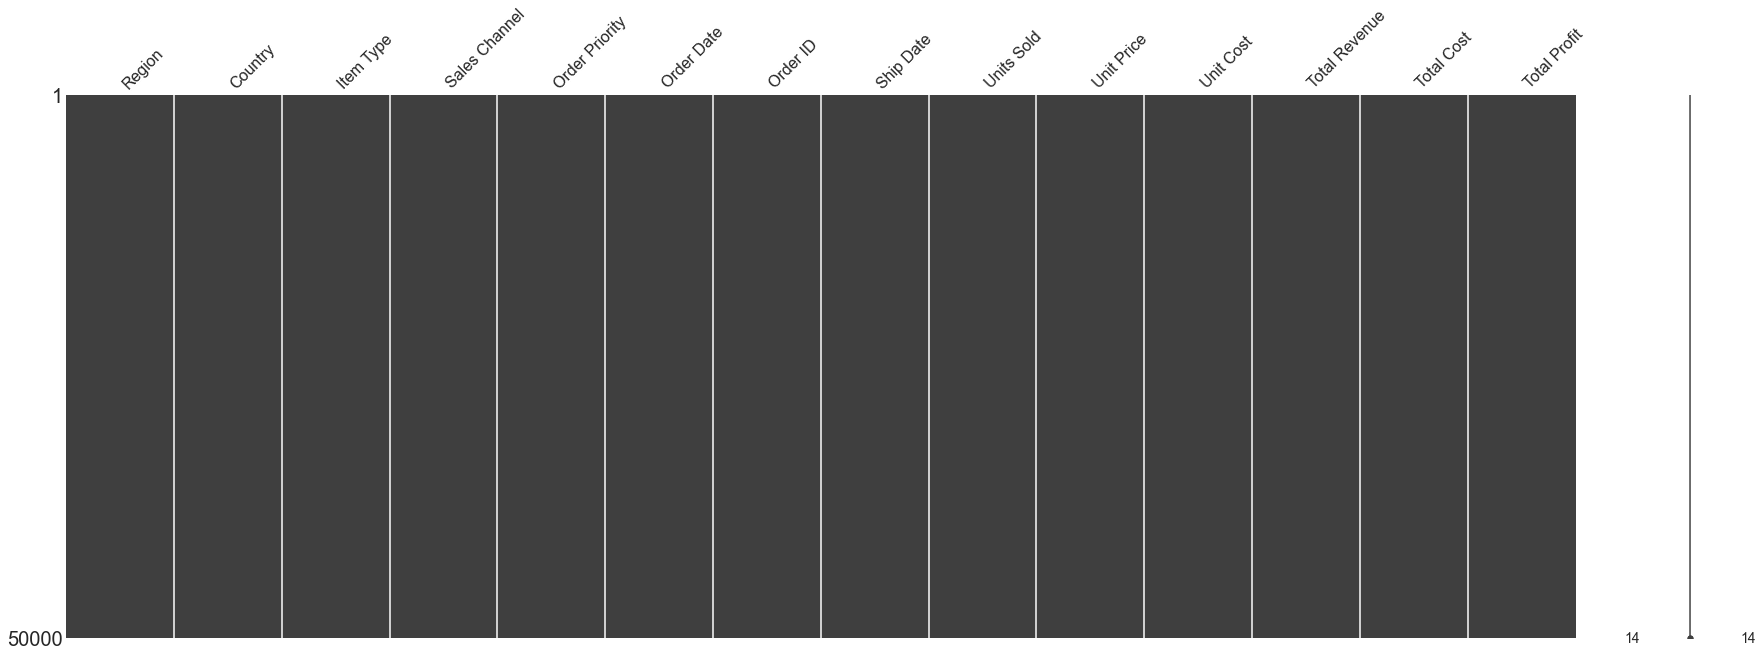

In [9]:
missingno.matrix(df, figsize=(30,10))

In [10]:
x.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost'],
      dtype='object')

In [11]:
x.Region.value_counts()

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64

In [12]:
x.Country.value_counts()

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Iran                   238
Yemen                  238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64

In [13]:
x['Sales Channel'].value_counts()

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64

In [14]:
x['Order Priority'].value_counts()         # l-Low, M-Medium, H-High, C-Critical

L    12588
M    12495
H    12471
C    12446
Name: Order Priority, dtype: int64

In [15]:
x['Item Type'].value_counts()

Meat               4221
Fruits             4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Office Supplies    4139
Household          4139
Baby Food          4078
Name: Item Type, dtype: int64

In [16]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,897751939,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,599480426,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70
2,Europe,Russia,Meat,Online,L,6/22/2017,538911855,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12
3,Europe,Moldova,Meat,Online,L,2/28/2012,459845054,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25
4,Europe,Malta,Cereal,Online,M,8/12/2010,626391351,9/13/2010,1975,205.70,117.11,406257.50,231292.25


In [17]:
x['Order ID'].value_counts()

784031856    1
115453279    1
745377147    1
854558074    1
518488442    1
            ..
770372331    1
341703402    1
941263806    1
296584784    1
934545409    1
Name: Order ID, Length: 50000, dtype: int64

In [18]:
x.drop('Order ID',axis=1,inplace=True)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/2015,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16
1,Europe,Iceland,Baby Food,Online,H,11/20/2010,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70
2,Europe,Russia,Meat,Online,L,6/22/2017,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12
3,Europe,Moldova,Meat,Online,L,2/28/2012,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25
4,Europe,Malta,Cereal,Online,M,8/12/2010,9/13/2010,1975,205.70,117.11,406257.50,231292.25


In [19]:
#visualising each feature

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64


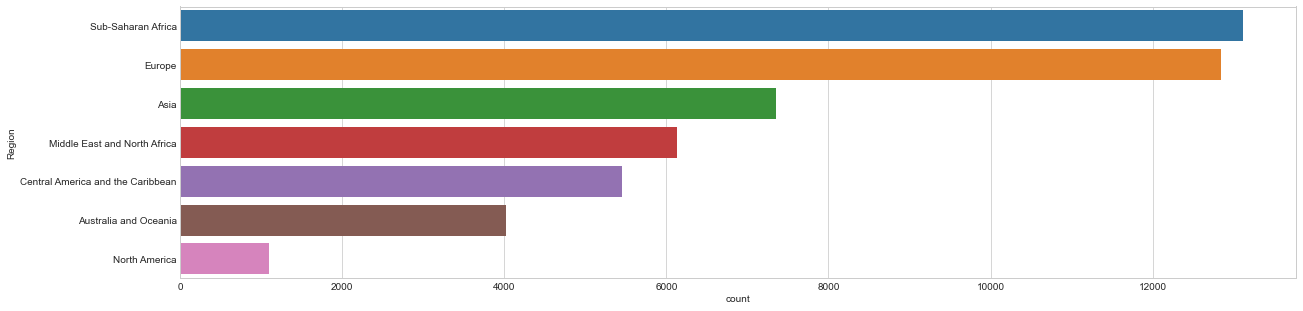

In [20]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Region',data=x);
print(x.Region.value_counts())

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Iran                   238
Yemen                  238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64


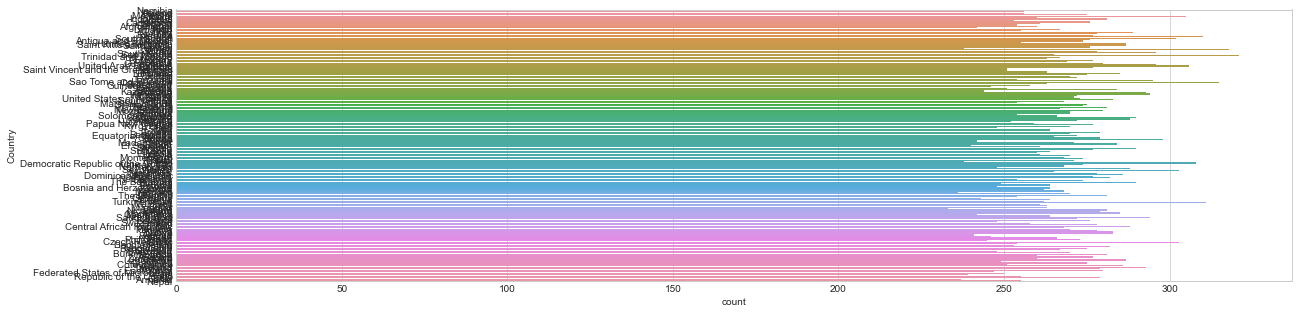

In [21]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Country',data=x);
print(x.Country.value_counts())

Meat               4221
Fruits             4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Office Supplies    4139
Household          4139
Baby Food          4078
Name: Item Type, dtype: int64


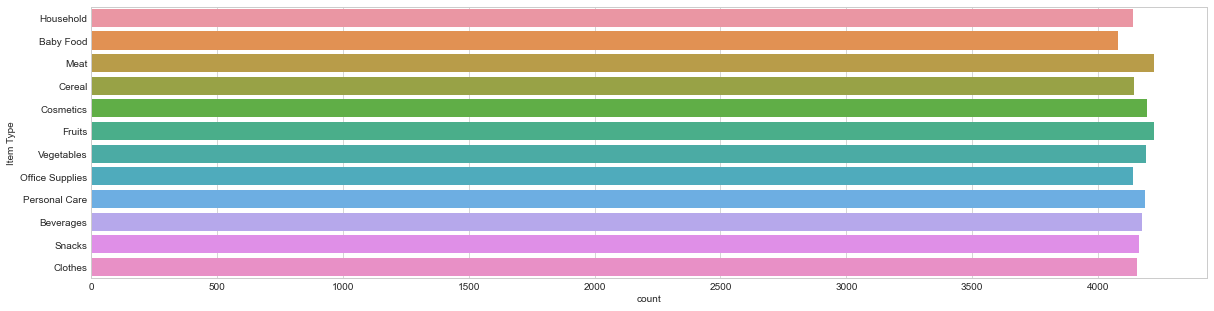

In [22]:
fig=plt.figure(figsize=(20,5))
sns.countplot(y='Item Type',data=x);
print(x['Item Type'].value_counts())

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64


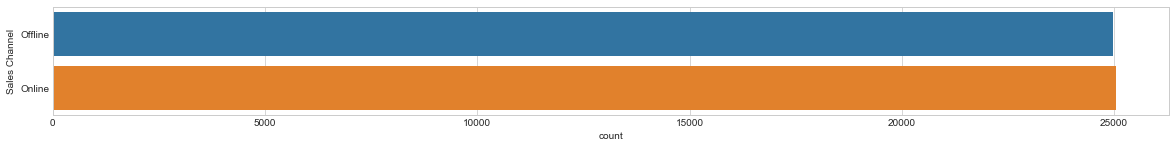

In [23]:
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Sales Channel',data=x);
print(x['Sales Channel'].value_counts())

L    12588
M    12495
H    12471
C    12446
Name: Order Priority, dtype: int64


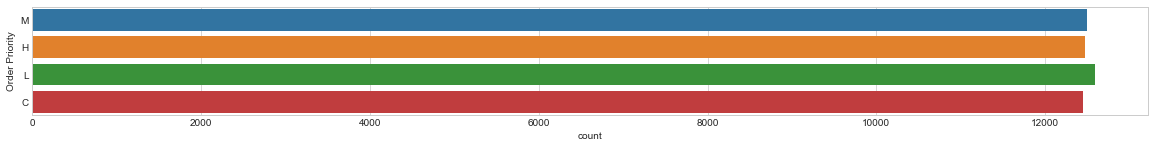

In [24]:
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Order Priority',data=x);
print(x['Order Priority'].value_counts())

In [25]:
x['Order Date'] = pd.to_datetime(x['Order Date'])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,10/12/2015,3604,668.27,502.54,2408445.08,1811154.16
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,1/9/2011,8435,255.28,159.42,2153286.80,1344707.70
2,Europe,Russia,Meat,Online,L,2017-06-22,6/25/2017,4848,421.89,364.69,2045322.72,1768017.12
3,Europe,Moldova,Meat,Online,L,2012-02-28,3/20/2012,7225,421.89,364.69,3048155.25,2634885.25
4,Europe,Malta,Cereal,Online,M,2010-08-12,9/13/2010,1975,205.70,117.11,406257.50,231292.25


In [26]:
x['Ship Date'] = pd.to_datetime(x['Ship Date'])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,2011-01-09,8435,255.28,159.42,2153286.80,1344707.70
2,Europe,Russia,Meat,Online,L,2017-06-22,2017-06-25,4848,421.89,364.69,2045322.72,1768017.12
3,Europe,Moldova,Meat,Online,L,2012-02-28,2012-03-20,7225,421.89,364.69,3048155.25,2634885.25
4,Europe,Malta,Cereal,Online,M,2010-08-12,2010-09-13,1975,205.70,117.11,406257.50,231292.25


In [27]:
x.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
dtype: object

In [28]:
x['Order Date_year'] = x['Order Date'].dt.year
x['Order Date_month'] = x['Order Date'].dt.month
x['Order Date_day'] = x['Order Date'].dt.day
x['Ship Date_year'] = x['Ship Date'].dt.year
x['Ship Date_month'] = x['Ship Date'].dt.month
x['Ship Date_day'] = x['Ship Date'].dt.day
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-08-31,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,2010-11-20,2011-01-09,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,2017-06-22,2017-06-25,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,2012-02-28,2012-03-20,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,2010-08-12,2010-09-13,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [29]:
x.drop('Order Date',axis=1,inplace=True)

In [30]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,2015-10-12,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,2011-01-09,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,2017-06-25,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,2012-03-20,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,2010-09-13,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [31]:
x.drop('Ship Date',axis=1,inplace=True)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [32]:
x['Order Date_year'].value_counts()

2011    6757
2012    6634
2014    6596
2010    6594
2015    6570
2016    6551
2013    6523
2017    3775
Name: Order Date_year, dtype: int64

In [33]:
x['Ship Date_year'].value_counts()

2011    6787
2012    6620
2016    6611
2014    6581
2013    6547
2015    6522
2010    6107
2017    4225
Name: Ship Date_year, dtype: int64

In [34]:
x['Order Date_month'].value_counts()

5     4571
1     4408
3     4354
7     4341
6     4311
4     4277
2     4136
12    3992
10    3948
8     3935
11    3906
9     3821
Name: Order Date_month, dtype: int64

In [35]:
x['Ship Date_month'].value_counts()

3     4515
5     4461
7     4435
6     4362
8     4266
4     4246
1     4206
10    3933
12    3927
2     3913
9     3869
11    3867
Name: Ship Date_month, dtype: int64

In [36]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,M,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,H,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,L,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,L,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,M,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [37]:
Order_Priority_dict = {'L':1, 'M':2, 'H':3, 'C':4}
x['Order Priority'] = x['Order Priority'].map(Order_Priority_dict)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,Household,Offline,2,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,Europe,Iceland,Baby Food,Online,3,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,Europe,Russia,Meat,Online,1,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,Europe,Moldova,Meat,Online,1,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,Europe,Malta,Cereal,Online,2,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [38]:
x['Item Type'].value_counts()

Meat               4221
Fruits             4221
Cosmetics          4193
Vegetables         4191
Personal Care      4186
Beverages          4173
Snacks             4163
Clothes            4155
Cereal             4141
Office Supplies    4139
Household          4139
Baby Food          4078
Name: Item Type, dtype: int64

In [39]:
Item_Type_dict = {'Meat':1,'Fruits':2,'Cosmetics':3,'Vegetables':4,'Personal Care':5,'Beverages':6,'Snacks':7,
                 'Clothes':8, 'Cereal':9, 'Household':0, 'Office Supplies':10 , 'Baby Food':11}
x['Item Type'] = x['Item Type'].map(Item_Type_dict)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,0,Offline,2,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,Europe,Iceland,11,Online,3,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,Europe,Russia,1,Online,1,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,Europe,Moldova,1,Online,1,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,Europe,Malta,9,Online,2,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [40]:
x['Sales Channel'].value_counts()

Online     25034
Offline    24966
Name: Sales Channel, dtype: int64

In [41]:
Sales_Channel_dict = {'Online':0 , 'Offline':1}
x['Sales Channel'] = x['Sales Channel'].map(Sales_Channel_dict)
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,Sub-Saharan Africa,Namibia,0,1,2,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,Europe,Iceland,11,0,3,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,Europe,Russia,1,0,1,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,Europe,Moldova,1,0,1,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,Europe,Malta,9,0,2,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [42]:
x['Region'].value_counts()

Sub-Saharan Africa                   13116
Europe                               12841
Asia                                  7348
Middle East and North Africa          6128
Central America and the Caribbean     5451
Australia and Oceania                 4017
North America                         1099
Name: Region, dtype: int64

In [43]:
Region_dict = {'Sub-Saharan Africa':0,'Europe':1,'Asia':2,'Middle East and North Africa':3,
              'Central America and the Caribbean':4,'Australia and Oceania':5,'North America':6}
x['Region'] = x['Region'].map(Region_dict)

In [44]:
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,Namibia,0,1,2,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,1,Iceland,11,0,3,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,1,Russia,1,0,1,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,1,Moldova,1,0,1,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,1,Malta,9,0,2,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [45]:
x['Order Date_year'].value_counts()

2011    6757
2012    6634
2014    6596
2010    6594
2015    6570
2016    6551
2013    6523
2017    3775
Name: Order Date_year, dtype: int64

In [46]:
x['Ship Date_year'].value_counts()

2011    6787
2012    6620
2016    6611
2014    6581
2013    6547
2015    6522
2010    6107
2017    4225
Name: Ship Date_year, dtype: int64

In [47]:
x['Country'].value_counts()

Trinidad and Tobago    321
Guinea                 318
Cape Verde             315
Maldives               311
Finland                310
                      ... 
Iran                   238
Yemen                  238
Armenia                237
Monaco                 236
Malawi                 233
Name: Country, Length: 185, dtype: int64

In [48]:
# Import label encoder 
from sklearn import preprocessing   
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()   
# Encode labels in column 'Country'. 
x['Country']= label_encoder.fit_transform(x['Country'])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,111,0,1,2,3604,668.27,502.54,2408445.08,1811154.16,2015,8,31,2015,10,12
1,1,67,11,0,3,8435,255.28,159.42,2153286.80,1344707.70,2010,11,20,2011,1,9
2,1,132,1,0,1,4848,421.89,364.69,2045322.72,1768017.12,2017,6,22,2017,6,25
3,1,104,1,0,1,7225,421.89,364.69,3048155.25,2634885.25,2012,2,28,2012,3,20
4,1,99,9,0,2,1975,205.70,117.11,406257.50,231292.25,2010,8,12,2010,9,13


In [49]:
#x.drop('Units Sold',axis=1,inplace=True)
#x.drop('Unit Price',axis=1,inplace=True)
#x.drop('Unit Cost',axis=1,inplace=True)
#x.head()

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']] = scaler.fit_transform(x[['Region','Country','Item Type','Sales Channel','Order Priority','Total Revenue','Total Cost']])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,1.0,0.333333,3604,668.27,502.54,0.360433,0.345040,2015,8,31,2015,10,12
1,0.166667,0.364130,1.000000,0.0,0.666667,8435,255.28,159.42,0.322247,0.256177,2010,11,20,2011,1,9
2,0.166667,0.717391,0.090909,0.0,0.000000,4848,421.89,364.69,0.306090,0.336822,2017,6,22,2017,6,25
3,0.166667,0.565217,0.090909,0.0,0.000000,7225,421.89,364.69,0.456170,0.501969,2012,2,28,2012,3,20
4,0.166667,0.538043,0.818182,0.0,0.333333,1975,205.70,117.11,0.060795,0.044060,2010,8,12,2010,9,13


In [51]:
x[['Units Sold','Unit Price','Unit Cost']] = scaler.fit_transform(x[['Units Sold','Unit Price','Unit Cost']])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,1.0,0.333333,0.360336,1.000000,0.956721,0.360433,0.345040,2015,8,31,2015,10,12
1,0.166667,0.364130,1.000000,0.0,0.666667,0.843484,0.373251,0.294379,0.322247,0.256177,2010,11,20,2011,1,9
2,0.166667,0.717391,0.090909,0.0,0.000000,0.484748,0.626096,0.690622,0.306090,0.336822,2017,6,22,2017,6,25
3,0.166667,0.565217,0.090909,0.0,0.000000,0.722472,0.626096,0.690622,0.456170,0.501969,2012,2,28,2012,3,20
4,0.166667,0.538043,0.818182,0.0,0.333333,0.197420,0.298009,0.212706,0.060795,0.044060,2010,8,12,2010,9,13


In [52]:
x[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']] = scaler.fit_transform(x[['Order Date_year','Order Date_month','Order Date_day','Ship Date_year','Ship Date_month','Ship Date_day']])
x.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0.000000,0.603261,0.000000,1.0,0.333333,0.360336,1.000000,0.956721,0.360433,0.345040,0.714286,0.636364,1.000000,0.714286,0.818182,0.366667
1,0.166667,0.364130,1.000000,0.0,0.666667,0.843484,0.373251,0.294379,0.322247,0.256177,0.000000,0.909091,0.633333,0.142857,0.000000,0.266667
2,0.166667,0.717391,0.090909,0.0,0.000000,0.484748,0.626096,0.690622,0.306090,0.336822,1.000000,0.454545,0.700000,1.000000,0.454545,0.800000
3,0.166667,0.565217,0.090909,0.0,0.000000,0.722472,0.626096,0.690622,0.456170,0.501969,0.285714,0.090909,0.900000,0.285714,0.181818,0.633333
4,0.166667,0.538043,0.818182,0.0,0.333333,0.197420,0.298009,0.212706,0.060795,0.044060,0.000000,0.636364,0.366667,0.000000,0.727273,0.400000


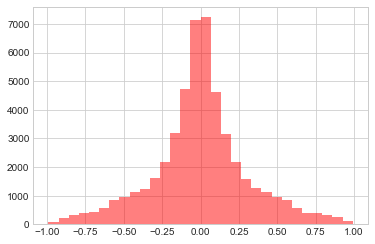

In [53]:
plt.figure()
x['Total Revenue'].diff().hist(color='r', alpha=0.5, bins=30)

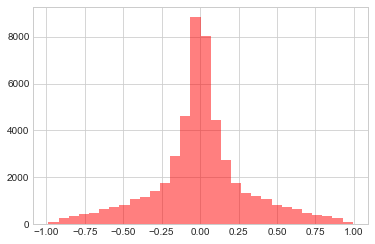

In [54]:
plt.figure()
x['Total Cost'].diff().hist(color='r', alpha=0.5, bins=30)

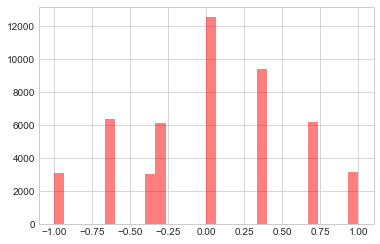

In [55]:
plt.figure()
x['Order Priority'].diff().hist(color='r', alpha=0.5, bins=30)

In [56]:
print(x['Order Priority'].skew())
print(x['Total Cost'].skew())
print(x['Total Revenue'].skew())
print(x['Region'].skew())
print(x['Country'].skew())
print(x['Item Type'].skew())
print(x['Sales Channel'].skew())
print(x['Order Date_year'].skew())
print(x['Order Date_month'].skew())
print(x['Order Date_day'].skew())
print(x['Ship Date_year'].skew())
print(x['Ship Date_month'].skew())
print(x['Ship Date_day'].skew())
print(x['Unit Cost'].skew())
print(x['Unit Price'].skew())
print(x['Units Sold'].skew())

0.005178202183085614
1.7566183450240556
1.5819423030463196
0.6389357601327329
-0.0036221183647383026
0.009010516045906218
0.002720084118663125
0.05130265537509577
0.061570231650677
-0.00548990377326081
0.03820349966143517
0.04611323819797584
0.018444527938867323
0.8934077531618685
0.7358884267098418
-0.012963991339447862


In [94]:
x['Total Cost'] = np.log1p(x['Total Cost'])

In [61]:
x['Total Cost']

0        0.230802
1        0.186850
2        0.227033
3        0.293640
4        0.041346
           ...   
49995    0.133624
49996    0.319781
49997    0.017634
49998    0.031366
49999    0.062587
Name: Total Cost, Length: 50000, dtype: float64

In [61]:
''''sampleMeans = []
for _ in range(50000):
    samples = x['Total Cost'].sample(n=1000)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
x['Total Cost'] = sampleMeans'''

0.0718440832496147


In [62]:
''''sampleMeans = []
for _ in range(50000):
    samples = x['Total Revenue'].sample(n=1000)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)
x['Total Revenue'] = sampleMeans
print(x['Total Revenue'].skew())'''
x['Total Revenue'] = np.log1p(x['Total Revenue'])
print(x['Total Revenue'].skew())

1.2593211887569982


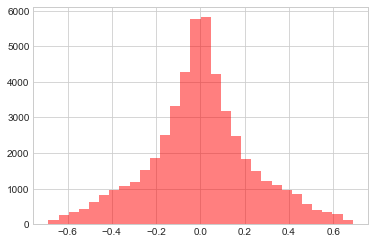

In [63]:
plt.figure()
x['Total Revenue'].diff().hist(color='r', alpha=0.5, bins=30)

In [64]:
#plt.figure()
#x['Total Cost'].diff().hist(color='r', alpha=0.5, bins=30)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [95]:
x_train.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
23990,0.166667,0.956522,0.000000,1.0,0.000000,0.659866,1.000000,0.956721,0.506796,0.335440,0.000000,0.363636,0.733333,0.000000,0.545455,0.200000
8729,0.166667,0.771739,0.090909,1.0,0.000000,0.168117,0.626096,0.690622,0.100926,0.099689,0.000000,0.545455,0.500000,0.000000,0.545455,0.866667
3451,0.333333,0.413043,0.363636,1.0,0.000000,0.463246,0.219641,0.162169,0.101486,0.071727,0.571429,0.909091,0.033333,0.571429,0.909091,0.166667
2628,0.000000,0.266304,0.272727,1.0,0.666667,0.128613,0.649331,0.494962,0.080846,0.058914,0.285714,0.636364,0.033333,0.285714,0.636364,0.966667
38352,0.166667,0.440217,0.272727,0.0,0.666667,0.574257,0.649331,0.494962,0.319004,0.203495,0.428571,0.272727,0.800000,0.428571,0.454545,0.000000


In [96]:
x_test.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
33553,0.333333,0.423913,0.727273,0.0,0.000000,0.188319,0.151683,0.055826,0.030342,0.012617,0.285714,0.545455,0.300000,0.285714,0.636364,0.033333
9427,0.666667,0.630435,0.000000,1.0,0.000000,0.176218,1.000000,0.956721,0.162386,0.135348,1.000000,0.454545,0.033333,1.000000,0.545455,0.066667
199,0.333333,0.521739,0.636364,1.0,1.000000,0.121912,0.217395,0.174736,0.027473,0.021902,0.428571,0.909091,0.566667,0.428571,1.000000,0.133333
12447,0.000000,0.157609,0.090909,0.0,0.333333,0.178718,0.626096,0.690622,0.106958,0.105015,0.714286,0.545455,0.166667,0.714286,0.636364,0.600000
39489,1.000000,0.320652,0.454545,0.0,0.666667,0.629063,0.109873,0.096035,0.074127,0.061697,0.571429,0.909091,0.366667,0.571429,0.909091,0.833333


In [66]:
x_train.shape

(33500, 16)

In [67]:
x_test.shape

(16500, 16)

In [68]:
y_train.shape

(33500,)

In [69]:
y_test.shape

(16500,)

In [70]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [71]:
acc = round(regr.score(x_train,y_train)*100,2)
#train_pred=model_selection.cross_val_predict(regr,x_train,y_train,cv=10,n_jobs=-1)
print("Accuracy: %s" % acc) 

Accuracy: 76.1


In [72]:
#from sklearn import svm
#svm_reg = svm.SVR()
#svm_reg.fit(x_train, y_train)

In [73]:
#acc = round(svm_reg.score(x_train,y_train)*100,2)
#train_pred=model_selection.cross_val_predict(svm_reg,x_train,y_train,cv=10,n_jobs=-1)
#print("Accuracy: %s" % acc) 

In [74]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
pred = reg.predict(x_test)
acc = round(reg.score(x_train,y_train)*100,2)
print("Accuracy: %s" % acc) 

Accuracy: 96.55


In [75]:
from sklearn.ensemble import GradientBoostingRegressor
reg_grad = GradientBoostingRegressor(max_depth=2)
reg_grad.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=2)

In [76]:
acc = round(reg_grad.score(x_train,y_train)*100,2)
print("Accuracy: %s" % acc) 

Accuracy: 99.16


In [77]:
from sklearn.neighbors import KNeighborsRegressor
regn = KNeighborsRegressor(n_neighbors=6)
regn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [78]:
acc = round(regn.score(x_train,y_train)*100,2)
#train_pred=model_selection.cross_val_predict(regn,x_train,y_train,cv=10,n_jobs=-1)
print("Accuracy: %s" % acc) 

Accuracy: 89.64


In [79]:
pred_grad = reg_grad.predict(x_test)
#accuracy_score(pred_grad,y_test)
predr = regr.predict(x_test)
predn = regn.predict(x_test)

In [80]:
pred_grad

array([151903.36085867, 303614.12487313,  59914.57694042, ...,
        23188.63319156, 732288.13760512, 732288.13760512])

In [81]:
predr

array([ 87992.32495504, 369553.51117058,  87992.32495504, ...,
        87992.32495504, 651826.87377015, 651826.87377015])

In [82]:
predn

array([160913.995     , 369274.06166667,  82963.93833333, ...,
        86259.625     , 654546.92666667, 724941.88      ])

In [83]:
mean_squared_error(y_test, pred_grad)

1242451103.1581578

In [84]:
mean_squared_error(y_test, predr)

34052418314.23451

In [85]:
mean_squared_error(y_test, predn)

21064733953.534733

In [86]:
mean_squared_error(y_test, pred)

4862508357.405812

In [87]:
rmse_grad = mean_squared_error(y_test, pred_grad,squared=False)

In [88]:
rmse_r = mean_squared_error(y_test, predr,squared=False)

In [89]:
rmse_n = mean_squared_error(y_test, predn,squared=False)

In [90]:
rmse = mean_squared_error(y_test, pred,squared=False)

In [91]:
print(rmse_grad)
print(rmse_r)
print(rmse_n)
print(rmse)

35248.41986753673
184532.9735148559
145136.94896040336
69731.688330384


In [92]:
from sklearn.metrics import r2_score
r2_grad = r2_score(y_test, pred_grad)
r2_r = r2_score(y_test,predr)
r2_n = r2_score(y_test,predn)

In [93]:
print(r2_grad)
print(r2_r)
print(r2_n)

0.9912161892738173
0.7592581337963857
0.8510777320935015
